In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable, get_cmap
from itscalledsoccer.client import AmericanSoccerAnalysis
import pandas as pd
import os
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

In [2]:
asa = AmericanSoccerAnalysis()

# Import 2025 G+ Data
gplus_data = asa.get_player_goals_added(
    leagues=["mls"],
    season_name = "2025",
    split_by_games = True
)

# Import Player Names
player_data = asa.get_players(leagues=["mls"])

# Merge them together
main_df = pd.merge(gplus_data, player_data, on='player_id', how='left')

In [3]:
main_df

,player_id,game_id,team_id,general_position,minutes_played,data,player_name,birth_date,nationality,primary_broad_position,primary_general_position,secondary_broad_position,secondary_general_position,season_name,height_ft,height_in,weight_lb,competition
0,0Oq624oPq6,0Oq6bW2xq6,jYQJ19EqGR,FB,82,"[{'action_type': 'Dribbling', 'goals_added_raw...",Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,NaN,NaN,"[2024, 2025]",5.0,8.0,150.0,mls
1,0Oq624oPq6,2vQ1bpxbMr,jYQJ19EqGR,FB,99,"[{'action_type': 'Dribbling', 'goals_added_raw...",Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,NaN,NaN,"[2024, 2025]",5.0,8.0,150.0,mls
2,0Oq624oPq6,315VpbWnQ9,jYQJ19EqGR,FB,57,"[{'action_type': 'Dribbling', 'goals_added_raw...",Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,NaN,NaN,"[2024, 2025]",5.0,8.0,150.0,mls
3,0Oq624oPq6,4JMAbPo65K,jYQJ19EqGR,FB,21,"[{'action_type': 'Dribbling', 'goals_added_raw...",Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,NaN,NaN,"[2024, 2025]",5.0,8.0,150.0,mls
4,0Oq624oPq6,4wM4b3Zzqj,jYQJ19EqGR,FB,73,"[{'action_type': 'Dribbling', 'goals_added_raw...",Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,NaN,NaN,"[2024, 2025]",5.0,8.0,150.0,mls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,zeQZXXm15K,p6qbjAxXq0,Z2vQ1xlqrA,DM,69,"[{'action_type': 'Dribbling', 'goals_added_raw...",Jake Davis,2002-01-03,USA,DF,FB,NaN,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls
10445,zeQZXXm15K,vzqoKZGjqa,Z2vQ1xlqrA,FB,105,"[{'action_type': 'Dribbling', 'goals_added_raw...",Jake Davis,2002-01-03,USA,DF,FB,NaN,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls
10446,zeQZXXm15K,XVqKzDGR50,Z2vQ1xlqrA,FB,63,"[{'action_type': 'Dribbling', 'goals_added_raw...",Jake Davis,2002-01-03,USA,DF,FB,NaN,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls
10447,zeQZXXm15K,XVqKzDL050,Z2vQ1xlqrA,FB,52,"[{'action_type': 'Dribbling', 'goals_added_raw...",Jake Davis,2002-01-03,USA,DF,FB,NaN,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls


In [4]:
def wrangle_data(main_df):
    # Step 1: Expand the 'data' column into rows
    expanded_data = main_df.explode('data')

    # Step 2: Normalize the 'data' column (convert list of dictionaries into columns)
    expanded_data = pd.concat(
        [expanded_data.drop(columns=['data']), expanded_data['data'].apply(pd.Series)],
        axis=1
    )

    return expanded_data

expanded_data = wrangle_data(main_df)

In [5]:
expanded_data

,player_id,game_id,team_id,general_position,minutes_played,player_name,birth_date,nationality,primary_broad_position,primary_general_position,...,secondary_general_position,season_name,height_ft,height_in,weight_lb,competition,action_type,goals_added_raw,goals_added_above_avg,count_actions
0,0Oq624oPq6,0Oq6bW2xq6,jYQJ19EqGR,FB,82,Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,...,NaN,"[2024, 2025]",5.0,8.0,150.0,mls,Dribbling,-0.0089,-0.0151,12
0,0Oq624oPq6,0Oq6bW2xq6,jYQJ19EqGR,FB,82,Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,...,NaN,"[2024, 2025]",5.0,8.0,150.0,mls,Fouling,-0.0019,0.0016,1
0,0Oq624oPq6,0Oq6bW2xq6,jYQJ19EqGR,FB,82,Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,...,NaN,"[2024, 2025]",5.0,8.0,150.0,mls,Interrupting,0.0099,-0.0424,8
0,0Oq624oPq6,0Oq6bW2xq6,jYQJ19EqGR,FB,82,Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,...,NaN,"[2024, 2025]",5.0,8.0,150.0,mls,Passing,-0.0103,-0.0421,41
0,0Oq624oPq6,0Oq6bW2xq6,jYQJ19EqGR,FB,82,Kalani Kossa-Rienzi,2002-06-27,USA,DF,FB,...,NaN,"[2024, 2025]",5.0,8.0,150.0,mls,Receiving,0.0150,-0.0052,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,zeQZXXm15K,zeQZpb4Z5K,Z2vQ1xlqrA,DM,57,Jake Davis,2002-01-03,USA,DF,FB,...,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls,Fouling,0.0015,0.0039,1
10448,zeQZXXm15K,zeQZpb4Z5K,Z2vQ1xlqrA,DM,57,Jake Davis,2002-01-03,USA,DF,FB,...,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls,Interrupting,0.0420,-0.0019,5
10448,zeQZXXm15K,zeQZpb4Z5K,Z2vQ1xlqrA,DM,57,Jake Davis,2002-01-03,USA,DF,FB,...,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls,Passing,0.0721,0.0460,30
10448,zeQZXXm15K,zeQZpb4Z5K,Z2vQ1xlqrA,DM,57,Jake Davis,2002-01-03,USA,DF,FB,...,NaN,"[2021, 2022, 2023, 2024, 2025]",5.0,10.0,150.0,mls,Receiving,0.0058,-0.0101,19


In [6]:
# Step 3: Group by player_id and calculate averages for relevant statistics
grouped_data = expanded_data.groupby(['player_id','action_type']).agg({
    'goals_added_raw': 'sum',
    'goals_added_above_avg': 'sum',
    'count_actions': 'sum',
    'minutes_played':'sum'
}).reset_index()

In [7]:
grouped_data['goals_added_raw_per90'] = grouped_data['goals_added_raw'] / (grouped_data['minutes_played'] / 90)
grouped_data['goals_added_above_avg_per90'] = grouped_data['goals_added_above_avg'] / (grouped_data['minutes_played'] / 90)
grouped_data

,player_id,action_type,goals_added_raw,goals_added_above_avg,count_actions,minutes_played,goals_added_raw_per90,goals_added_above_avg_per90
0,0Oq624oPq6,Dribbling,0.3172,0.2386,173,988,0.028895,0.021735
1,0Oq624oPq6,Fouling,-0.0818,-0.0452,16,988,-0.007451,-0.004117
2,0Oq624oPq6,Interrupting,0.9425,0.3184,126,988,0.085855,0.029004
3,0Oq624oPq6,Passing,0.5906,0.2232,513,988,0.053800,0.020332
4,0Oq624oPq6,Receiving,0.2706,-0.0073,361,988,0.024650,-0.000665
...,...,...,...,...,...,...,...,...
4267,zeQZe4aYqK,Fouling,-0.0385,-0.0431,2,65,-0.053308,-0.059677
4268,zeQZe4aYqK,Interrupting,0.0520,0.0191,5,65,0.072000,0.026446
4269,zeQZe4aYqK,Passing,0.0149,0.0097,13,65,0.020631,0.013431
4270,zeQZe4aYqK,Receiving,0.0122,-0.0473,11,65,0.016892,-0.065492


In [8]:
# Step 4: (Optional) Add player names for better readability
grouped_data = pd.merge(grouped_data, main_df[['player_id', 'player_name','general_position']].drop_duplicates(), on='player_id', how='left')
grouped_data

,player_id,action_type,goals_added_raw,goals_added_above_avg,count_actions,minutes_played,goals_added_raw_per90,goals_added_above_avg_per90,player_name,general_position
0,0Oq624oPq6,Dribbling,0.3172,0.2386,173,988,0.028895,0.021735,Kalani Kossa-Rienzi,FB
1,0Oq624oPq6,Dribbling,0.3172,0.2386,173,988,0.028895,0.021735,Kalani Kossa-Rienzi,W
2,0Oq624oPq6,Fouling,-0.0818,-0.0452,16,988,-0.007451,-0.004117,Kalani Kossa-Rienzi,FB
3,0Oq624oPq6,Fouling,-0.0818,-0.0452,16,988,-0.007451,-0.004117,Kalani Kossa-Rienzi,W
4,0Oq624oPq6,Interrupting,0.9425,0.3184,126,988,0.085855,0.029004,Kalani Kossa-Rienzi,FB
...,...,...,...,...,...,...,...,...,...,...
10309,zeQZe4aYqK,Passing,0.0149,0.0097,13,65,0.020631,0.013431,Zakaria Taifi,FB
10310,zeQZe4aYqK,Receiving,0.0122,-0.0473,11,65,0.016892,-0.065492,Zakaria Taifi,W
10311,zeQZe4aYqK,Receiving,0.0122,-0.0473,11,65,0.016892,-0.065492,Zakaria Taifi,FB
10312,zeQZe4aYqK,Shooting,0.0000,-0.0290,0,65,0.000000,-0.040154,Zakaria Taifi,W


In [9]:
all_totals = expanded_data.groupby(['player_id','game_id']).agg({
    'goals_added_raw': 'sum',
    'goals_added_above_avg': 'sum',
    'count_actions': 'sum',
    'minutes_played': 'sum'
}).reset_index()

all_totals = pd.merge(all_totals, main_df[['player_id', 'player_name','general_position']].drop_duplicates(), on='player_id', how='left')

all_totals

,player_id,game_id,goals_added_raw,goals_added_above_avg,count_actions,minutes_played,player_name,general_position
0,0Oq624oPq6,0Oq6bW2xq6,0.0038,-0.1137,91,492,Kalani Kossa-Rienzi,FB
1,0Oq624oPq6,0Oq6bW2xq6,0.0038,-0.1137,91,492,Kalani Kossa-Rienzi,W
2,0Oq624oPq6,2vQ1bpxbMr,0.2747,0.1329,171,594,Kalani Kossa-Rienzi,FB
3,0Oq624oPq6,2vQ1bpxbMr,0.2747,0.1329,171,594,Kalani Kossa-Rienzi,W
4,0Oq624oPq6,315VpbWnQ9,0.1569,0.0752,44,342,Kalani Kossa-Rienzi,FB
...,...,...,...,...,...,...,...,...
26873,zeQZe4aYqK,aDQ0bp4l5E,0.0083,-0.0316,8,102,Zakaria Taifi,FB
26874,zeQZe4aYqK,gOMnAZy8Qw,-0.0234,-0.0588,10,90,Zakaria Taifi,W
26875,zeQZe4aYqK,gOMnAZy8Qw,-0.0234,-0.0588,10,90,Zakaria Taifi,FB
26876,zeQZe4aYqK,jYQJmNgkqG,0.0117,-0.0055,3,72,Zakaria Taifi,W


NOW, we proceed to analyze the league percentiles for a specific player. In this instance,
we will proceed with the Timbers' Finn Surman.

In [28]:
import scipy.stats as stats

player_df = grouped_data[grouped_data['player_name'] == 'Ian Smith'][grouped_data['general_position'] == 'FB']
#print(player_df)

value = player_df[['action_type','goals_added_raw_per90']]

print(f"PLAYER: {value}")

position_data = grouped_data[((grouped_data['general_position'] == 'FB') | (grouped_data['general_position'] == 'FB')) & (grouped_data['minutes_played'] > 800)]
#print(f"NAMES: {position_data['player_name'].unique()}")
all_values = position_data[['action_type','goals_added_raw_per90']]
params = ['Dribbling','Fouling','Interrupting','Passing','Receiving','Shooting']

percentile = []

for param in params:
    param_all = all_values[all_values['action_type'] == param]['goals_added_raw_per90']
    param_player = value[value['action_type'] == param]['goals_added_raw_per90']

    percentile.append(stats.percentileofscore(param_all,param_player)[0])

print(f"{position_data[position_data['action_type'] == 'Interrupting'].sort_values(by='goals_added_raw_per90', ascending=False).head(6)[['player_name','goals_added_raw_per90']]}")

print(percentile)



PLAYER:        action_type  goals_added_raw_per90
9750     Dribbling              -0.007336
9753       Fouling               0.007954
9756  Interrupting               0.063214
9759       Passing               0.043513
9762     Receiving               0.033958
9765      Shooting               0.008761
            player_name  goals_added_raw_per90
7462  Nicholas Scardina               0.150591
1409    Osaze Urhoghide               0.141083
6467        Brayan Vera               0.139701
5291    Adilson Malanda               0.135825
3534        Brandon Bye               0.129983
9236  Anthony Markanich               0.127711
[np.float64(25.000000000000004), np.float64(90.38461538461539), np.float64(54.48717948717949), np.float64(73.07692307692308), np.float64(58.333333333333336), np.float64(31.410256410256412)]


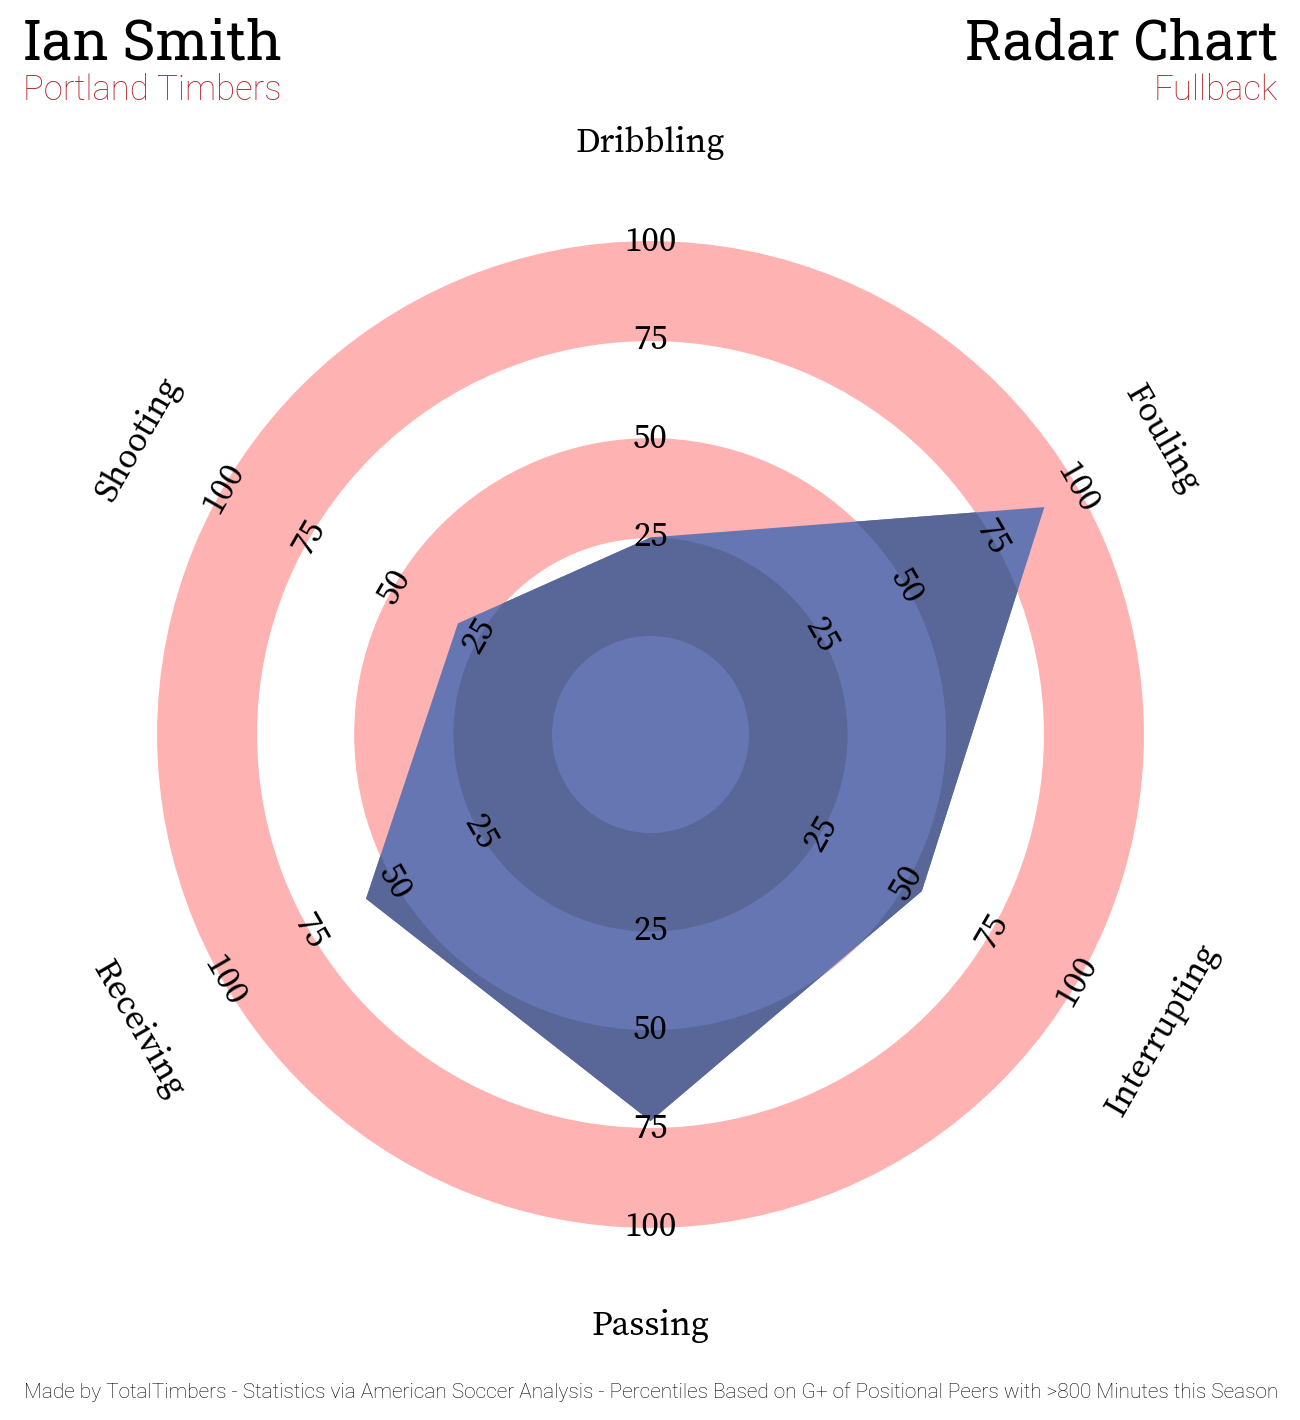

In [29]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

# Example stat names
params = ['Dribbling','Fouling','Interrupting','Passing','Receiving','Shooting']


# Define min-max ranges (all percentiles here)
low = [0] * len(params)
high = [100] * len(params)

round_int = [True] * len(params)
lower_is_better = None

# Radar setup exactly like docs
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=round_int,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

# creating the figure using the grid function from mplsoccer:
fig, ax = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=ax['radar'])

rings_inner = radar.draw_circles(ax=ax['radar'], facecolor='#ffb2b2', edgecolor='#ffb2b2')
radar_output = radar.draw_radar(percentile, ax=ax['radar'],
                                kwargs_radar={'facecolor': "#6576b2"},
                                kwargs_rings={'facecolor': "#596798"})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax['radar'], fontsize=25,
                                       fontproperties=serif_regular.prop)
param_labels = radar.draw_param_labels(ax=ax['radar'], fontsize=25,
                                       fontproperties=serif_regular.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = ax['endnote'].text(0.99, 0.5, 'Made by TotalTimbers - Statistics via American Soccer Analysis - Percentiles Based on G+ of Positional Peers with >800 Minutes this Season', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = ax['title'].text(0.01, 0.6, 'Ian Smith', fontsize=40,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = ax['title'].text(0.01, 0.05, 'Portland Timbers', fontsize=25,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#B6282F')
title3_text = ax['title'].text(0.99, 0.6, 'Radar Chart', fontsize=40,
                                fontproperties=robotto_bold.prop, ha='right', va='center')
title4_text = ax['title'].text(0.99, 0.05, 'Fullback', fontsize=25,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#B6282F')

In [58]:
games = asa.get_games(seasons=['2025'])
games['date_only'] = pd.to_datetime(games['date_time_utc']).dt.date
games['game_id'] = games['game_id'].astype(str)
games['date_pretty'] = pd.to_datetime(games['date_time_utc']).dt.strftime('%b %d, %Y')
games = games[['game_id', 'date_only','date_pretty']]

all_totals = pd.merge(all_totals, games, on='game_id', how='left')

        player_id     game_id  goals_added_raw  goals_added_above_avg  \
24862  wvq9gxBmMW  NPqxjpngM9          -0.0406                -0.2106   
24864  wvq9gxBmMW  NPqxjpngM9          -0.0406                -0.2106   
24863  wvq9gxBmMW  NPqxjpngM9          -0.0406                -0.2106   
24871  wvq9gxBmMW  Oa5wjZnjM1          -0.1205                -0.2436   
24872  wvq9gxBmMW  Oa5wjZnjM1          -0.1205                -0.2436   
24873  wvq9gxBmMW  Oa5wjZnjM1          -0.1205                -0.2436   
24849  wvq9gxBmMW  315Vpbk6Q9          -0.2042                -0.2915   
24847  wvq9gxBmMW  315Vpbk6Q9          -0.2042                -0.2915   
24848  wvq9gxBmMW  315Vpbk6Q9          -0.2042                -0.2915   
24875  wvq9gxBmMW  Xj5Ypb90Mb          -0.0013                -0.0241   
24874  wvq9gxBmMW  Xj5Ypb90Mb          -0.0013                -0.0241   
24876  wvq9gxBmMW  Xj5Ypb90Mb          -0.0013                -0.0241   
24840  wvq9gxBmMW  0Oq6bWLxq6           0.0387     

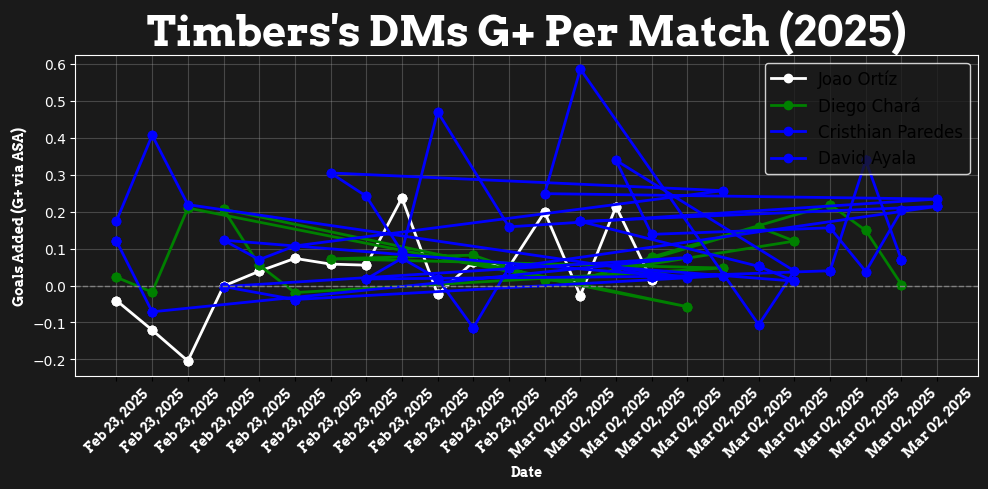

In [59]:
import matplotlib.pyplot as plt

# Load font
font_path = '../Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Prepare data
df_surm = all_totals[(all_totals['player_name'] == 'Joao Ortíz')]
df_surm = df_surm.sort_values("date_only")
print(df_surm)
df_surm1 = all_totals[all_totals['player_name'] == 'Diego Chará']
df_surm1 = df_surm1.sort_values("date_only")
df_surm2 = all_totals[all_totals['player_name'] == 'Cristhian Paredes']
df_surm2 = df_surm2.sort_values("date_only")
df_surm3 = all_totals[all_totals['player_name'] == 'David Ayala']
df_surm3 = df_surm3.sort_values("date_only")

all_totals = all_totals[all_totals['player_name'].isin(['Joao Ortíz', 'Diego Chará', 'Cristhian Paredes', 'David Ayala'])]
dates_all = all_totals.sort_values("date_only")

# Set up figure and axes with dark background
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#1a1a1a')
ax.set_facecolor('#1a1a1a')

# Plot line in white
ax.plot(df_surm["date_pretty"], df_surm["goals_added_raw"],
        marker='o', linewidth=2, color='white',label = 'Joao Ortíz')
ax.plot(df_surm1["date_pretty"], df_surm1["goals_added_raw"],
        marker='o', linewidth=2, color='green',label = 'Diego Chará')
ax.plot(df_surm2["date_pretty"], df_surm2["goals_added_raw"],
        marker='o', linewidth=2, color='blue',label = 'Cristhian Paredes')
ax.plot(df_surm3["date_pretty"], df_surm3["goals_added_raw"],
        marker='o', linewidth=2, color='blue',label = 'David Ayala')



# Add horizontal line at 0
ax.axhline(0, color='gray', linestyle='--', lw=1)

# Title and labels in white, with custom font
ax.set_title("Timbers's DMs G+ Per Match (2025)", fontproperties=font_props,
             fontsize=30, color='white', weight='bold')
ax.set_ylabel("Goals Added (G+ via ASA)", color='white', fontproperties=font_props)
ax.set_xlabel("Date", color='white', fontproperties=font_props)

# X-ticks and Y-ticks in white
ax.set_xticklabels(dates_all["date_pretty"], rotation=45, color='white', fontproperties=font_props)
ax.tick_params(axis='y', colors='white')

# Axis spines in white
for spine in ax.spines.values():
    spine.set_color('white')

plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize=12, facecolor='#1a1a1a', edgecolor='white',)
plt.tight_layout()
plt.show()

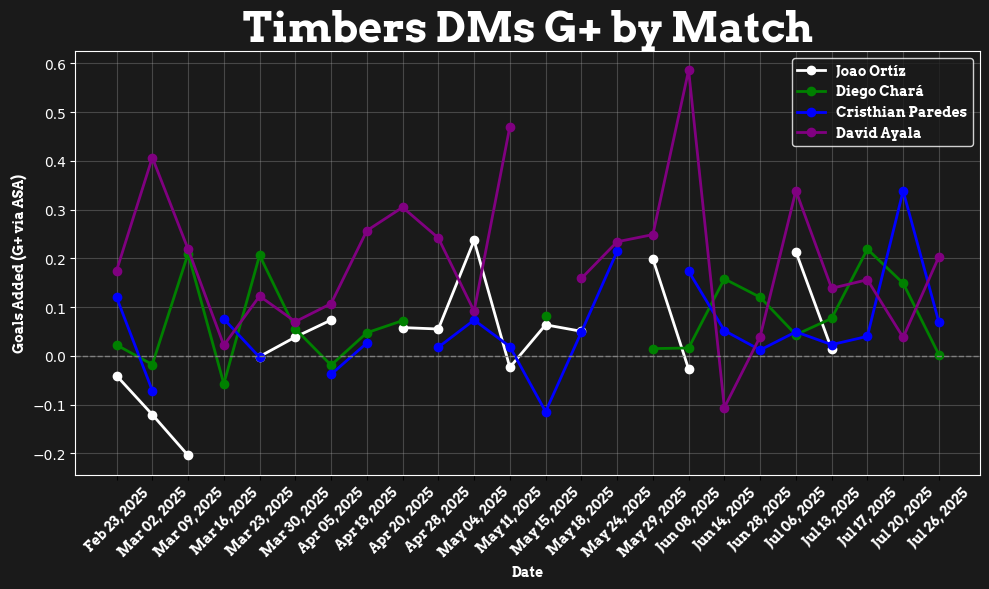

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Load font
font_path = '../Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Master sorted list of dates
master_dates = sorted(all_totals['date_pretty'].unique(), key=lambda x: pd.to_datetime(x))

def reindex_player(df, master_dates):
    df = df.drop_duplicates(subset='date_pretty')
    df = df.set_index('date_pretty').reindex(master_dates)
    return df

# Reindex each player
df_zuparic = reindex_player(df_surm, master_dates)
df_miller = reindex_player(df_surm1, master_dates)
df_smith = reindex_player(df_surm2, master_dates)
df_miller1 = reindex_player(df_surm3, master_dates)

# Set up figure and axes with dark background
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#1a1a1a')
ax.set_facecolor('#1a1a1a')

# Plot each player, skipping missing values
ax.plot(master_dates, df_zuparic["goals_added_raw"], marker='o', linewidth=2, color='white', label='Joao Ortíz')
ax.plot(master_dates, df_miller["goals_added_raw"], marker='o', linewidth=2, color='green', label='Diego Chará')
ax.plot(master_dates, df_smith["goals_added_raw"], marker='o', linewidth=2, color='blue', label='Cristhian Paredes')
ax.plot(master_dates, df_miller1["goals_added_raw"], marker='o', linewidth=2, color='purple', label='David Ayala')

ax.axhline(0, color='gray', linestyle='--', lw=1)
ax.set_title("Timbers DMs G+ by Match", fontproperties=font_props,
             fontsize=30, color='white', weight='bold')
ax.set_ylabel("Goals Added (G+ via ASA)", color='white', fontproperties=font_props)
ax.set_xlabel("Date", color='white', fontproperties=font_props)

ax.set_xticks(master_dates)
ax.set_xticklabels(master_dates, rotation=45, color='white', fontproperties=font_props)
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_color('white')

plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize=12, facecolor='#1a1a1a', edgecolor='white',
            prop=font_props,labelcolor='white')
plt.tight_layout()
plt.show()